# 1 - Giới thiệu
### ĐỒ ÁN TỐT NGHIỆP ĐẠI HỌC
- **Đề tài: “ XÂY DỰNG ỨNG DỤNG PHÂN LOẠI HOA QUẢ DÙNG MÔ HÌNH HỌC SÂU”**
- Người hướng dẫn: TS. NGUYỄN HỒNG SƠN
- Sinh viên thực hiện: NGUYỄN THỊ PHÚC THI
- Mã số sinh viên: N19DCC194

# 2 - Các thư viện cần thiết

In [136]:
# Định nghĩa các thư viện

# Thư viện gọi dataset
import pandas as pd
import numpy as np

# Thư viện trực quan hóa
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from PIL import Image
import glob, cv2, os
import pathlib

# Thư viện tiền xử lý dữ liệu
import tensorflow as tf
import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Định nghĩa mô hình thư viện và thuật toán đào tạo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.layers import Rescaling

# Thư viện đánh giá mô hình
from sklearn.metrics import classification_report 
import warnings
warnings.filterwarnings('ignore')

# Kiểm thử mô hình
from keras_preprocessing import image
from tensorflow.keras.models import load_model
from tqdm import tqdm

# 3 - Load dữ liệu

Dataset **Fruit Classification** được lấy toàn bộ từ Kaggle: https://www.kaggle.com/datasets/sshikamaru/fruit-recognition

In [2]:
# Chỉ định đường dẫn của dataset
train_dir = 'D:/AI/Dataset/archive1/train'
val_dir = 'D:/AI/Dataset/archive1/test'

Thông tin bộ dữ liệu:
- Tổng số hình ảnh là 22495.
- Tập huấn luyện có kích thước tối đa là 16854 ảnh (mỗi ảnh một quả).
- Tập test có kích thước tối đa là 5641 ảnh (mỗi ảnh một quả).
- Số lượng nhãn là 33 loại quả.
- Kích thước hình ảnh 100x100 pixel.

Nội dung:
- Thư mục đào tạo chứa 33 thư mục con chứa hình ảnh đào tạo cho từng loại trái cây. Có tổng cộng 16854 hình ảnh.
- Thư mục test chứa 5641 ảnh test.

# 4 - Trực quan hóa dữ liệu

In [3]:
# Xem mô tả dữ liệu
print('Thông tin tập thư mục dữ liệu : \n' + '='*50)
for labelpath, labelnames, filenames in os.walk('D:/AI/Dataset/archive1'):
  print(f"Có {len(labelnames)} thư mục và có {len(filenames)} tệp bên trong {labelpath}")

Thông tin tập thư mục dữ liệu : 
Có 2 thư mục và có 0 tệp bên trong D:/AI/Dataset/archive1
Có 1 thư mục và có 0 tệp bên trong D:/AI/Dataset/archive1\test
Có 0 thư mục và có 5641 tệp bên trong D:/AI/Dataset/archive1\test\test
Có 33 thư mục và có 0 tệp bên trong D:/AI/Dataset/archive1\train
Có 0 thư mục và có 492 tệp bên trong D:/AI/Dataset/archive1\train\Apple Braeburn
Có 0 thư mục và có 492 tệp bên trong D:/AI/Dataset/archive1\train\Apple Granny Smith
Có 0 thư mục và có 492 tệp bên trong D:/AI/Dataset/archive1\train\Apricot
Có 0 thư mục và có 427 tệp bên trong D:/AI/Dataset/archive1\train\Avocado
Có 0 thư mục và có 490 tệp bên trong D:/AI/Dataset/archive1\train\Banana
Có 0 thư mục và có 462 tệp bên trong D:/AI/Dataset/archive1\train\Blueberry
Có 0 thư mục và có 490 tệp bên trong D:/AI/Dataset/archive1\train\Cactus fruit
Có 0 thư mục và có 492 tệp bên trong D:/AI/Dataset/archive1\train\Cantaloupe
Có 0 thư mục và có 492 tệp bên trong D:/AI/Dataset/archive1\train\Cherry
Có 0 thư mục và có

In [4]:
# Nhãn dữ liệu
print('Nhãn dữ liệu trong tập huấn luyện : \n' + '='*50)
for labelpath, labelname, file in os.walk(train_dir):
  if labelpath.split("/")[-1] != 'train':
    print(f'Có {len(file)} hình ảnh được phân loại là {labelpath.split("/")[-1]}')

Nhãn dữ liệu trong tập huấn luyện : 
Có 492 hình ảnh được phân loại là train\Apple Braeburn
Có 492 hình ảnh được phân loại là train\Apple Granny Smith
Có 492 hình ảnh được phân loại là train\Apricot
Có 427 hình ảnh được phân loại là train\Avocado
Có 490 hình ảnh được phân loại là train\Banana
Có 462 hình ảnh được phân loại là train\Blueberry
Có 490 hình ảnh được phân loại là train\Cactus fruit
Có 492 hình ảnh được phân loại là train\Cantaloupe
Có 492 hình ảnh được phân loại là train\Cherry
Có 490 hình ảnh được phân loại là train\Clementine
Có 450 hình ảnh được phân loại là train\Corn
Có 392 hình ảnh được phân loại là train\Cucumber Ripe
Có 984 hình ảnh được phân loại là train\Grape Blue
Có 466 hình ảnh được phân loại là train\Kiwi
Có 492 hình ảnh được phân loại là train\Lemon
Có 490 hình ảnh được phân loại là train\Limes
Có 490 hình ảnh được phân loại là train\Mango
Có 438 hình ảnh được phân loại là train\Onion White
Có 479 hình ảnh được phân loại là train\Orange
Có 492 hình ảnh được p

In [5]:
# Danh sách 33 nhãn dùng để phân loại
labels = pathlib.Path(train_dir)
label_names=np.array(sorted([item.name for item in labels.glob('*')]))
print(label_names)

['Apple Braeburn' 'Apple Granny Smith' 'Apricot' 'Avocado' 'Banana'
 'Blueberry' 'Cactus fruit' 'Cantaloupe' 'Cherry' 'Clementine' 'Corn'
 'Cucumber Ripe' 'Grape Blue' 'Kiwi' 'Lemon' 'Limes' 'Mango' 'Onion White'
 'Orange' 'Papaya' 'Passion Fruit' 'Peach' 'Pear' 'Pepper Green'
 'Pepper Red' 'Pineapple' 'Plum' 'Pomegranate' 'Potato Red' 'Raspberry'
 'Strawberry' 'Tomato' 'Watermelon']


Found 16854 files belonging to 33 classes.


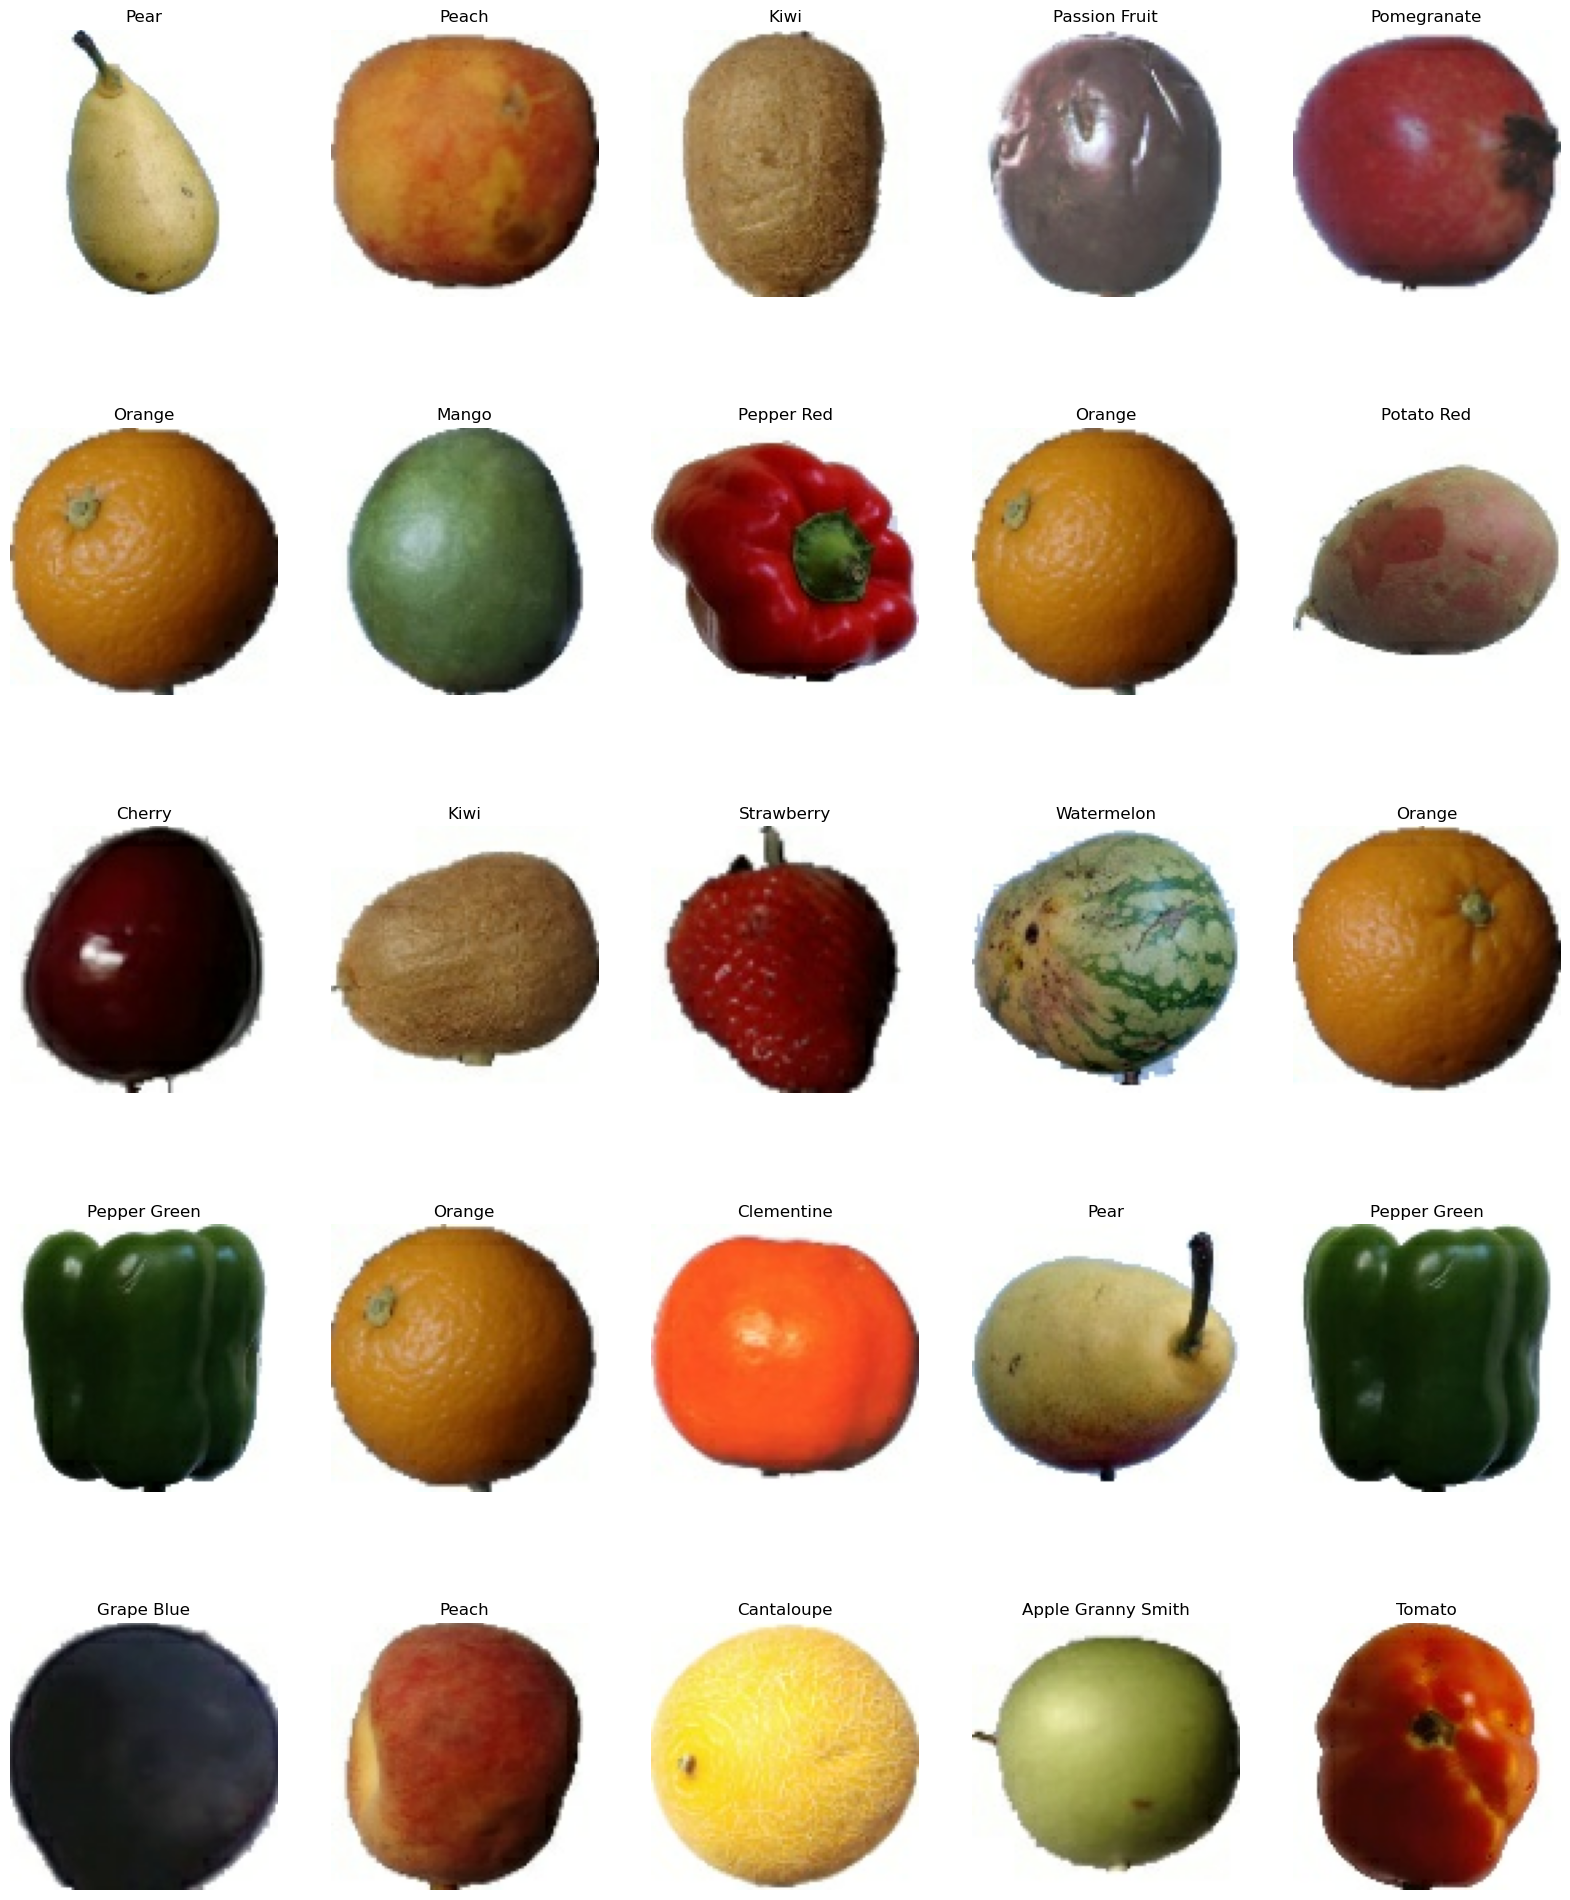

In [6]:
# Hình ảnh của một số loại hoa quả
attribute = image_dataset_from_directory(train_dir, image_size=(100,100))
plt.figure(figsize=(20,25))
for image, labels in attribute.take(1):
  for i in range (25):
    plt.subplot(5,5, i + 1)
    plt.imshow(np.array(image[i]).astype("uint8"))
    plt.title(attribute.class_names[labels[i]])
    plt.axis("off")

Mỗi hình ảnh có chiều cao và chiều rộng 100x100. Đây là tập dữ liệu gồm 33 hình ảnh có kích thước 100x100x3 (RGB). Dựa trên kích thước của hình ảnh được hiển thị, ta hình dung ngẫu nhiên 25 hình ảnh trái cây làm đại diện, như sau:
1. Hình ảnh giấy xanh chiếm ưu thế hơn với màu xanh đậm hoặc xanh đậm.
2. Hình ảnh màu đỏ giấy có màu đỏ tươi hơn và một chút xanh lục.
3. Hình ảnh quả chuối có màu hơi vàng.
4. Hình ảnh chanh dây có màu xám đậm nhưng một số mặt của quả có màu nâu.
5. Hình ảnh quả kiwi nổi trội hơn với màu nâu nhạt.
6. Hình quả dứa có màu xanh nhưng có một số chấm trắng và vàng.
7. Hình ảnh Màu cam có màu cam sáng chiếm ưu thế hơn.
8. Hình ảnh cây ngô có màu vàng tươi chủ đạo và một số chấm trắng.
9. Hình ảnh Grap Blue có màu đen đặc.
10. Hình ảnh Onion White có màu trắng nâu.
11. Hình ảnh Manggo có màu xanh nhạt hơn.
12. Hình ảnh Raspberry có màu hạt dẻ.
13. Hình quả đu đủ có tông màu vàng và một số phần màu vàng đậm.
14. Hình quả đào có tông màu đỏ và hơi nhạt.
15. Hình quả lê có màu trắng vàng.
16. Hình ảnh Apple Breaburn có màu đỏ và một số chấm màu vàng nhạt.
17. Hình ảnh quả dâu tây có màu đỏ sẫm và một số có màu trắng.
18. Hình ảnh quả catcus có màu vàng sậm, một số có màu vàng tươi và có một số chấm màu nâu.
19. Hình ảnh quả dưa chuột chín có màu nâu và sọc nâu nhạt.
20. Hình ảnh quả anh đào có màu đỏ sẫm và một số viền màu đỏ tươi.

# 5 - Tiền xử lý dữ liệu

In [7]:
# Đảm bảo rằng các số ngẫu nhiên được tạo ra trong quá trình thực thi sẽ giống nhau ở mỗi lần
tf.random.set_seed(10)

# Tiền xử lý dữ liệu
train_data= ImageDataGenerator(rescale = 1./255, validation_split=0.2)
val_data= ImageDataGenerator(rescale = 1./255, validation_split=0.8)
test_data= ImageDataGenerator(rescale = 1./255)

Đây là quá trình tiền xử lý và tăng cường dữ liệu. Quá trình này là quá trình tạo ra các phiên bản biến thể của hình ảnh bằng cách thực hiện các biến đổi như xoay, lật, thu phóng, và thay đổi độ tương phản. Quá trình này giúp mô hình học được các biến thể của dữ liệu và giảm nguy cơ quá mức học của mô hình trên tập huấn luyện (overfitting). ImageDataGenerator là một công cụ trong TensorFlow được sử dụng để tạo ra các phiên bản tăng cường của hình ảnh để đào tạo mô hình mạng nơ-ron (CNN). Các tham số được sử dụng ở đây bao gồm:

 - **Rescale**: Thực hiện việc chuẩn hóa pixel của hình ảnh. Ở đây, pixel được chia cho 255 để đưa về khoảng từ 0 đến 1.
 - **Validation_split**: Chia dữ liệu thành tập huấn luyện và tập kiểm tra. Ở đây, 20% dữ liệu được sử dụng cho tập kiểm tra (validation_split=0.2), và 80% dữ liệu còn lại sử dụng cho tập huấn luyện (validation_split=0.8) trong tập dữ liệu xác nhận (val_data).
 
Lưu ý rằng tập kiểm tra (test_data) không được chia thành tập huấn luyện và tập kiểm tra, và nó chỉ được chuẩn hóa pixel.

In [8]:
# Khởi tạo training_data
training_data = train_data.flow_from_directory(train_dir,
                                            batch_size=64,target_size=(100, 100),
                                            subset='training',class_mode='categorical',seed=10)

# Khởi tạo validation_data
validation_data = val_data.flow_from_directory(train_dir,
                                               batch_size=64,target_size=(100, 100),
                                               subset='training',class_mode='categorical',seed=10,shuffle=False)

# Khởi tạo testing_data
testing_data = test_data.flow_from_directory(val_dir,
                                            batch_size=64,target_size=(100, 100),
                                            subset='training',class_mode='categorical',seed=46)

Found 13493 images belonging to 33 classes.
Found 3383 images belonging to 33 classes.
Found 5641 images belonging to 1 classes.


 - Batch_size được đặt là 64, có nghĩa là tập dữ liệu huấn luyện với 13,493 hình ảnh sẽ được chia thành nhiều batch có kích thước 64 hình ảnh mỗi batch. Điều này giúp quá trình huấn luyện mô hình diễn ra mượt mà và hiệu quả hơn.
 - class_mode được thiết lập là 'categorical' vì mô hình này có một lớp đầu ra dạng categorical với 33 nhãn trái cây. Điều này đảm bảo rằng mục tiêu được định dạng đúng để đào tạo mô hình phân loại đa lớp.

In [9]:
# Đánh số các nhãn phân loại
labelindex = training_data.class_indices
labelindex

{'Apple Braeburn': 0,
 'Apple Granny Smith': 1,
 'Apricot': 2,
 'Avocado': 3,
 'Banana': 4,
 'Blueberry': 5,
 'Cactus fruit': 6,
 'Cantaloupe': 7,
 'Cherry': 8,
 'Clementine': 9,
 'Corn': 10,
 'Cucumber Ripe': 11,
 'Grape Blue': 12,
 'Kiwi': 13,
 'Lemon': 14,
 'Limes': 15,
 'Mango': 16,
 'Onion White': 17,
 'Orange': 18,
 'Papaya': 19,
 'Passion Fruit': 20,
 'Peach': 21,
 'Pear': 22,
 'Pepper Green': 23,
 'Pepper Red': 24,
 'Pineapple': 25,
 'Plum': 26,
 'Pomegranate': 27,
 'Potato Red': 28,
 'Raspberry': 29,
 'Strawberry': 30,
 'Tomato': 31,
 'Watermelon': 32}

# 6 - Định nghĩa mô hình

In [10]:
# Khởi tạo CNN
model = tf.keras.models.Sequential()

# Cấu hình layer 1
model.add(Conv2D(33, 3, padding = 'same', activation='relu',input_shape=(100,100,3)))
model.add(MaxPool2D(2)) # Maxpool with 2x2 matrix

# Cấu hình layer 2
model.add(Conv2D(66, 3, padding = 'same', activation='relu'))
model.add(MaxPool2D(2))

# Cấu hình layer 3
model.add(Conv2D(99, 3, padding = 'same', activation='relu'))
model.add(MaxPool2D(2))

# Cấu hình layer 4
model.add(Conv2D(128, 3, padding = 'same', activation='relu'))
model.add(MaxPool2D(2))

# Lớp Flatten
model.add(Flatten())
model.add(Dense(33, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(33, activation='softmax')) 


**Khởi tạo mô hình CNN**:
 - Sử dụng thư viện con Sequential để bắt đầu mạng neural bằng cách sử dụng tf.keras.models.Sequential.
 
**Cấu hình Layer 1**:
 - Sử dụng Convolution2D là bước đầu tiên của CNN để xử lý dữ liệu dưới dạng hình ảnh 2 chiều.
 - Số lượng bộ lọc được đặt là 33, áp dụng vào ảnh đầu vào kích thước 100x100 pixel với 3 kênh màu.
 - Sử dụng padding='same' để phân phối đều dữ liệu đầu vào.
 - Kích hoạt bằng hàm ReLU, mô phỏng cách các tế bào thần kinh sinh học làm việc.
 - Thêm một layer MaxPooling 2D với kích thước cửa sổ 2x2 để giảm kích thước của đầu ra.

**Cấu hình Layer 2, 3 và 4**:
 - Tương tự như layer 1, chỉ có sự thay đổi về số lượng bộ lọc và sự mở rộng của mô hình:

**Flatten Layer**:
 - Layer này dùng để làm phẳng đầu ra của các layer Convolutional thành một vector một chiều, là đầu vào cho các layer fully connected.

**Dense Layer 1**:
 - Sử dụng layer fully connected với 33 đơn vị và hàm kích hoạt là ReLU.

Thêm một **layer Dropout** với tỷ lệ bỏ qua 20%. Dropout là một kỹ thuật chống overfitting bằng cách ngẫu nhiên "bỏ qua" một số đơn vị trong quá trình huấn luyện.

**Dense Layer 2 (Output Layer)**:
 - Sử dụng layer fully connected với 33 đơn vị và hàm kích hoạt softmax, phù hợp cho bài toán phân loại với 33 loại trái cây khác nhau. Hàm softmax chuyển đầu ra thành xác suất.

In [11]:
# Điều kiện dừng
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights=True)]

# Biên dịch mô hình
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",metrics=['accuracy'])

**Điều kiện dừng**:
 - EarlyStopping: Là một callback trong TensorFlow để dừng quá trình huấn luyện sớm nếu một điều kiện được đưa ra. Ở đây, điều kiện được đặt là giám sát sự thay đổi của hàm mất mát trên tập kiểm tra (val_loss).
 - monitor='val_loss': Điều này có nghĩa là quá trình huấn luyện sẽ dừng khi hàm mất mát trên tập kiểm tra không giảm nữa.
 - patience=5: Số lượng epoch mà mô hình có thể chấp nhận không có cải thiện trước khi dừng.
 - restore_best_weights=True: Khôi phục trọng số của mô hình để có trạng thái tốt nhất khi dừng.
 
**Compile Model**:
 - Loss="categorical_crossentropy": Hàm mất mát được sử dụng trong quá trình huấn luyện, đặc biệt cho bài toán phân loại nhiều lớp (categorical). Trong trường hợp này, mô hình có 33 đầu ra (theo số lượng loại trái cây), và softmax đã được sử dụng ở lớp cuối cùng.
 - Optimizer="Adam": Adam là một thuật toán tối ưu hóa thường được sử dụng trong huấn luyện mạng nơ-ron. Chọn trình tối ưu hóa Adam vì nó có khả năng xử lý hiệu quả các độ dốc thưa thớt trong các bài toán nhiễu. Adam thường là một lựa chọn tốt trong quá trình huấn luyện mạng nơ-ron khi dữ liệu nhiễu và các độ dốc không đồng đều. Tham số learning rate được để là mặc định: cố định là 0,001
 - Metrics=['accuracy']: Đánh giá hiệu suất của mô hình bằng độ chính xác trong quá trình huấn luyện.



In [12]:
# Tóm tắt mô hình
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 33)      924       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 33)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 66)        19668     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 66)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 99)        58905     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 99)        0

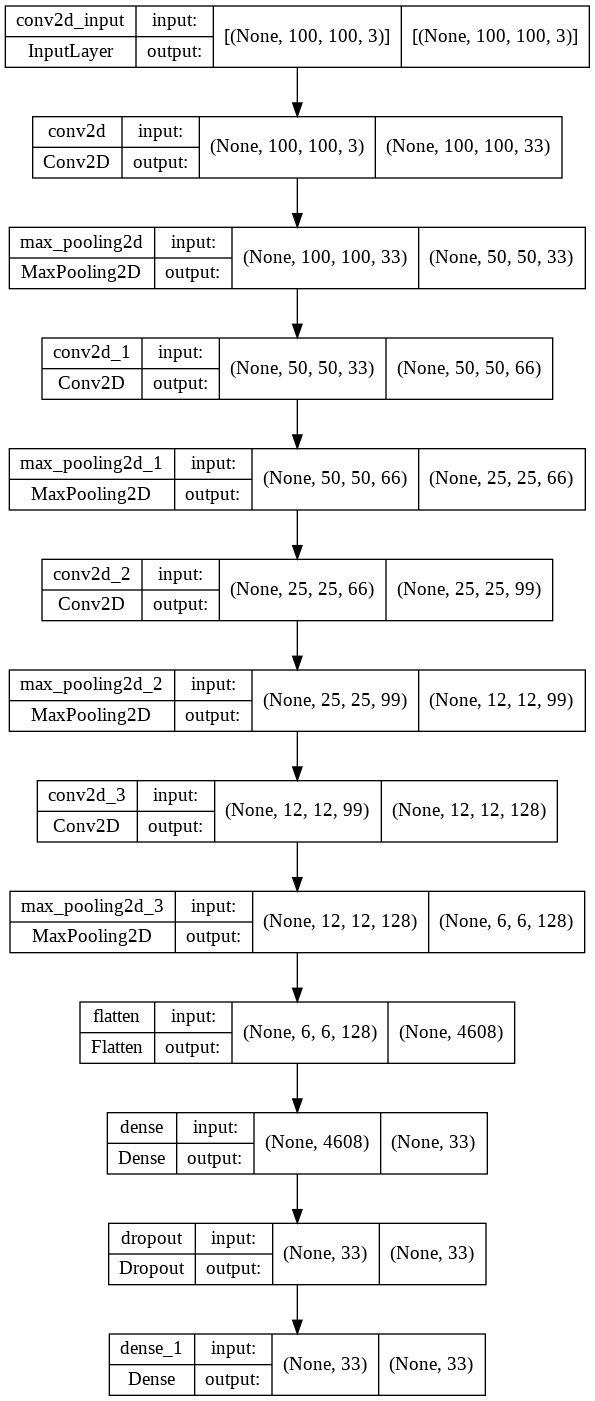

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

# 7 -  Huấn luyện mô hình

Trong bước huấn luyện mô hình, áp dụng mô hình cho training_data, sau đó kiểm tra kết quả trên validation_data. Tham số epochs được điền theo ý muốn. Càng lớn, độ chính xác càng tốt, nhưng nếu nó hội tụ, độ chính xác sẽ không tăng nữa mà còn làm mô hình bị overfitting nếu tiếp tục huấn huấn luyện. Trong trường hợp này, sử dụng epochs là 100. Callback được sử dụng để theo dõi giá trị hàm mất mát, độ chính xác cao nhất cũng như dừng khi đạt yêu cầu.

In [13]:
# Huấn luyện mô hình
%time

project = model.fit(training_data, epochs = 100, verbose=1, validation_data = validation_data, callbacks=callbacks)

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/100
211/211 [==============================] - 105s 491ms/step - loss: 1.7067 - accuracy: 0.4942 - val_loss: 0.1452 - val_accuracy: 0.9758
Epoch 2/100
211/211 [==============================] - 100s 472ms/step - loss: 0.4424 - accuracy: 0.8530 - val_loss: 0.0308 - val_accuracy: 0.9979
Epoch 3/100
211/211 [==============================] - 100s 473ms/step - loss: 0.2767 - accuracy: 0.9052 - val_loss: 0.0078 - val_accuracy: 0.9994
Epoch 4/100
211/211 [==============================] - 100s 475ms/step - loss: 0.2361 - accuracy: 0.9183 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 5/100
211/211 [==============================] - 100s 475ms/step - loss: 0.1910 - accuracy: 0.9316 - val_loss: 0.0045 - val_accuracy: 0.9988
Epoch 6/100
211/211 [==============================] - 100s 473ms/step - loss: 0.1894 - accuracy: 0.9350 - val_loss: 0.0055 - val_accuracy: 0.9997
Epoch 7/100
211/211 [==============================] - 100s 472ms/step - loss: 

Dựa vào log của quá trình huấn luyện, có thể nhận xét như sau:

1. **Loss và Accuracy trên tập huấn luyện:**
   - Loss giảm dần qua mỗi epoch, từ 1.7067 xuống đến 0.1218.
   - Accuracy tăng từ 0.4942 lên đến 0.9577.
   - Sự giảm loss và tăng accuracy là dấu hiệu tích cực, cho thấy mô hình đang học được từ dữ liệu huấn luyện và có khả năng dự đoán tốt hơn.

2. **Loss và Accuracy trên tập validation:**
   - Loss trên tập validation giảm mạnh từ 0.1452 xuống đến 7.2374e-04.
   - Accuracy trên tập validation tăng từ 0.9758 lên đến 1.0000.
   - Hiệu suất tốt trên tập validation cho thấy mô hình không bị quá mức tập trung vào dữ liệu huấn luyện mà quên khả năng dự đoán trên dữ liệu mới.

3. **Tổng quan:**
   - Mô hình có dấu hiệu overfitting khi có sự chênh lệch giữa accuracy trên tập huấn luyện và tập validation. Tuy nhiên, dấu hiệu này đang được kiểm soát vì accuracy trên cả hai tập đều tăng.

4. **Chú ý:**
   - Mô hình đã đạt được accuracy tốt trên cả tập huấn luyện và tập validation, chỉ có dấu hiệu rất nhỏ về overfitting.
   - Loss trên tập validation đã giảm xuống rất thấp, đặc biệt là ở các epochs sau, có thể đây là một mô hình tốt để triển khai.

Tóm lại, mặc dù có một số dấu hiệu về overfitting, nhưng mô hình có vẻ đang học được và có khả năng dự đoán tốt trên dữ liệu mới.

# 8 - Đánh giá mô hình

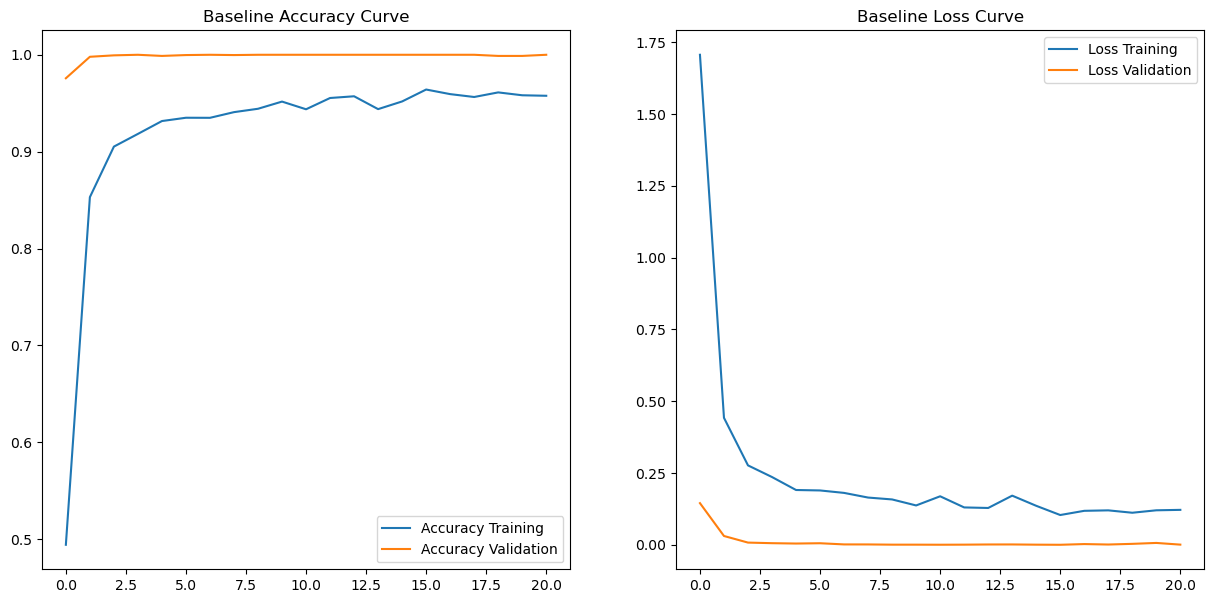

In [14]:
metrics = pd.DataFrame(project.history)

# Baseline accuracy curve
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(metrics.accuracy, label='Accuracy Training')
plt.plot(metrics.val_accuracy, label='Accuracy Validation')
plt.title('Baseline Accuracy Curve')
plt.legend()

# Baseline loss curve
plt.subplot(1, 2, 2)
plt.plot(metrics.loss, label='Loss Training')
plt.plot(metrics.val_loss, label='Loss Validation')
plt.title('Baseline Loss Curve')
plt.legend()
plt.show()

**Nhận xét**:

1. **Baseline Accuracy Curve:** Đối với accuracy curve, ta thấy một đường tăng dần qua mỗi epoch. Điều này chỉ ra sự cải thiện liên tục của mô hình trong việc dự đoán trên tập huấn luyện. Đồng thời, ta cũng sẽ quan sát sự tăng trưởng của accuracy trên tập validation, mặc dù có thể thấy sự chệch giữa accuracy trên tập huấn luyện và validation từ một số epochs nào đó.


2. **Baseline Loss Curve:** Đối với loss curve, ta thấy đường giảm dần qua mỗi epoch. Điều này chỉ ra rằng mô hình đang học được từ dữ liệu huấn luyện và giảm mức độ lỗi. Loss trên tập validation cũng sẽ giảm, thường là mạnh mẽ hơn so với loss trên tập huấn luyện.

**Đánh giá:**
   - Sự gia tăng của accuracy và giảm của loss trên cả tập huấn luyện và validation đều là dấu hiệu tích cực.
   - Sự chệch giữa accuracy trên tập huấn luyện và validation có thể chỉ ra sự overfitting, nhưng độ chệch này giảm dần qua các epochs.
   - Đối với loss curve, nếu loss trên tập validation giảm mạnh và ổn định, đó là dấu hiệu của một mô hình tốt có thể triển khai.

In [15]:
y_pred = model.predict(validation_data)
y_pred = np.argmax(y_pred, axis=1)

report_val = classification_report(validation_data.labels, 
                                    y_pred, labels = np.arange(33), 
                                    target_names= list(validation_data.class_indices.keys()))
print(report_val)

53/53 [==============================] - 5s 95ms/step
                    precision    recall  f1-score   support

    Apple Braeburn       1.00      1.00      1.00        99
Apple Granny Smith       1.00      1.00      1.00        99
           Apricot       1.00      1.00      1.00        99
           Avocado       1.00      1.00      1.00        86
            Banana       1.00      1.00      1.00        98
         Blueberry       1.00      1.00      1.00        93
      Cactus fruit       1.00      1.00      1.00        98
        Cantaloupe       1.00      1.00      1.00        99
            Cherry       1.00      1.00      1.00        99
        Clementine       1.00      1.00      1.00        98
              Corn       1.00      1.00      1.00        90
     Cucumber Ripe       1.00      1.00      1.00        79
        Grape Blue       1.00      1.00      1.00       197
              Kiwi       1.00      1.00      1.00        94
             Lemon       1.00      1.00      

# 9 - Cải tiến mô hình

In [16]:
# Khởi tạo mạng CNN
_input = tf.keras.layers.Input(shape=(100,100,3))
improv = _input

# Cấu hình layer 1
improv = Conv2D(33, 3, padding = 'same', activation = 'elu')(improv)
improv = Conv2D(33, 3, padding = 'same', activation = 'elu')(improv)
improv = MaxPool2D((2))(improv)

# Cấu hình layer 2
improv = Conv2D(66, 3, padding = 'same',activation = 'elu')(improv)
improv = Conv2D(66, 3, padding = 'same',activation = 'elu')(improv)
improv = MaxPool2D((2))(improv)

# Cấu hình layer 3
improv = Conv2D(99, 3, padding = 'same',activation = 'elu')(improv)
improv = Conv2D(99, 3, padding = 'same',activation = 'elu')(improv)
improv = MaxPool2D((2))(improv)

# Cấu hình layer 4
improv = Conv2D(128, 3, padding = 'same',activation = 'elu')(improv)
improv = MaxPool2D((2))(improv)

# Lớp Flatten
improv = Flatten()(improv)
improv = Dense(33, activation='elu')(improv) #use better activation
improv = Dropout(0.2)(improv)
improv = Dense(33, activation='softmax')(improv) #output

# Cải tiến mô hình
model_improv = tf.keras.models.Model(_input, improv)

# Biên dịch mô hình
opt = tf.keras.optimizers.Adam(epsilon=0.01)
model_improv.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

model_improv.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 33)      924       
                                                                 
 conv2d_5 (Conv2D)           (None, 100, 100, 33)      9834      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 50, 50, 33)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 50, 50, 66)        19668     
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 66)        39270     
                                                             

Thông tin cải tiến:
- **Sử dụng ELU Activation**:
    - Thay vì sử dụng ReLU, ta chuyển sang ELU (Exponential Linear Unit) activation, một lựa chọn thường được sử dụng để giảm vấn đề vanishing gradient.
- **Tăng số lượng lớp Convolutional và Pooling**:
    - Mỗi lớp convolutional được thêm một lớp nữa để tăng độ phức tạp của mô hình.
- **Optimizer và Learning Rate Adjustment**:
    - Tinh chỉnh optimizer bằng cách sử dụng Adam với epsilon=0.01. Điều này có thể giúp ổn định quá trình tối ưu hóa.
- **Kiến trúc Mô hình cải tiến**:
    - Sử dụng API Model của Keras để xây dựng mô hình, điều này giúp linh hoạt hơn trong việc xây dựng các kiến trúc phức tạp.
- **Dropout Rate**:
    - Duy trì lớp Dropout với tỷ lệ dropout là 20% để giảm overfitting.
    
Nhìn chung, mô hình cải tiến có vẻ có độ phức tạp cao hơn và sử dụng một số kỹ thuật cải tiến nhằm cải thiện hiệu suất. 

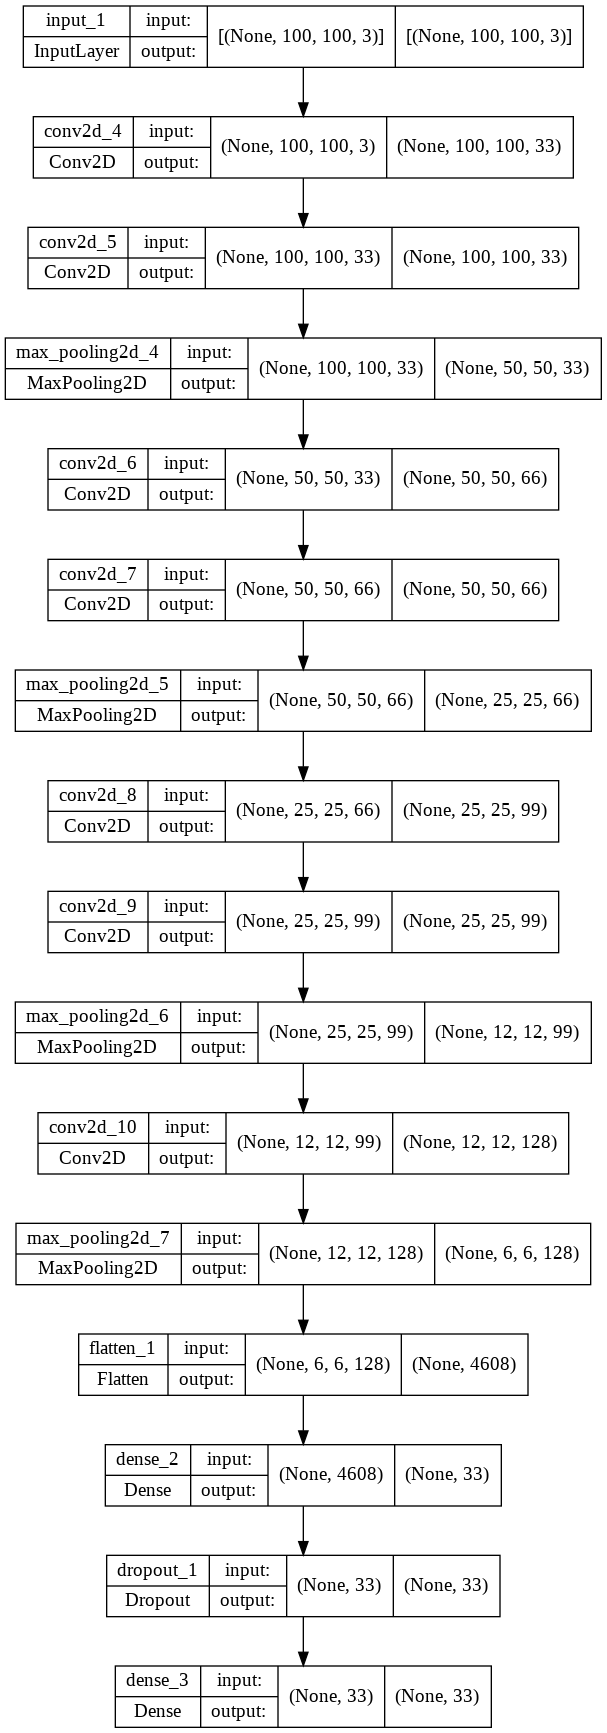

In [ ]:
tf.keras.utils.plot_model(model_improv, show_shapes=True)

In [18]:
# Huấn luyện mô hình đã được cải tiến
%time

project_improv = model_improv.fit(training_data, epochs = 100, verbose=1, validation_data = validation_data, callbacks = callbacks)

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/100
211/211 [==============================] - 311s 1s/step - loss: 2.1287 - accuracy: 0.4108 - val_loss: 0.2749 - val_accuracy: 0.9379
Epoch 2/100
211/211 [==============================] - 312s 1s/step - loss: 0.2699 - accuracy: 0.9153 - val_loss: 0.0168 - val_accuracy: 0.9970
Epoch 3/100
211/211 [==============================] - 313s 1s/step - loss: 0.0764 - accuracy: 0.9778 - val_loss: 0.0088 - val_accuracy: 0.9985
Epoch 4/100
211/211 [==============================] - 313s 1s/step - loss: 0.0584 - accuracy: 0.9821 - val_loss: 0.0051 - val_accuracy: 0.9976
Epoch 5/100
211/211 [==============================] - 313s 1s/step - loss: 0.0525 - accuracy: 0.9829 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 6/100
211/211 [==============================] - 314s 1s/step - loss: 0.0354 - accuracy: 0.9892 - val_loss: 0.0013 - val_accuracy: 0.9997
Epoch 7/100
211/211 [==============================] - 312s 1s/step - loss: 0.0214 - accuracy: 0.

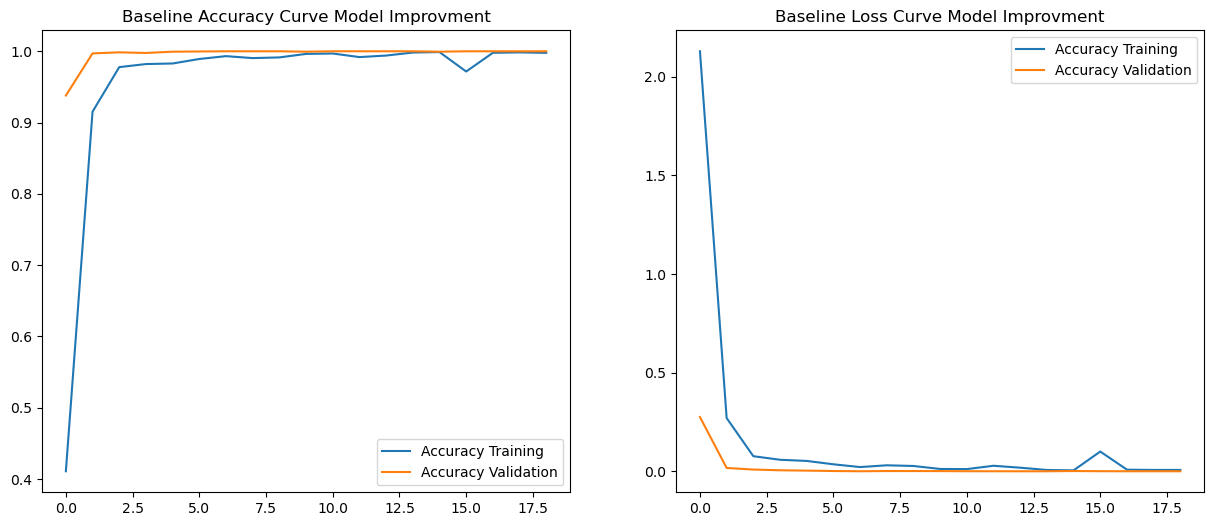

In [19]:
metrics = pd.DataFrame(project_improv.history)

#accuracy plot
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(metrics.accuracy, label='Accuracy Training')
plt.plot(metrics.val_accuracy, label='Accuracy Validation')
plt.title('Baseline Accuracy Curve Model Improvment')
plt.legend()

#loss plot
plt.subplot(1, 2, 2)
plt.plot(metrics.loss, label='Accuracy Training')
plt.plot(metrics.val_loss, label='Accuracy Validation')
plt.title('Baseline Loss Curve Model Improvment')
plt.legend()
plt.show()

In [20]:
y_pred_improv = model_improv.predict(validation_data)
y_pred_improv = np.argmax(y_pred_improv, axis=1)

announce_improv = classification_report(validation_data.labels, 
                                    y_pred_improv, labels = np.arange(33), 
                                    target_names= list(validation_data.class_indices.keys()))
print(announce_improv)

53/53 [==============================] - 12s 230ms/step
                    precision    recall  f1-score   support

    Apple Braeburn       1.00      1.00      1.00        99
Apple Granny Smith       1.00      1.00      1.00        99
           Apricot       1.00      1.00      1.00        99
           Avocado       1.00      1.00      1.00        86
            Banana       1.00      1.00      1.00        98
         Blueberry       1.00      1.00      1.00        93
      Cactus fruit       1.00      1.00      1.00        98
        Cantaloupe       1.00      1.00      1.00        99
            Cherry       1.00      1.00      1.00        99
        Clementine       1.00      1.00      1.00        98
              Corn       1.00      1.00      1.00        90
     Cucumber Ripe       1.00      1.00      1.00        79
        Grape Blue       1.00      1.00      1.00       197
              Kiwi       1.00      1.00      1.00        94
             Lemon       1.00      1.00    

So sánh kết quả huấn luyện trước và sau khi cải tiến, có một số điểm quan trọng:

1. **Loss và Accuracy trên tập huấn luyện:**
   - Loss giảm mạnh từ 2.1287 xuống 0.0069.
   - Accuracy tăng từ 0.4108 lên đến 0.9978.
   - Cả loss và accuracy đều có sự cải thiện lớn, cho thấy mô hình đang học rất hiệu quả từ dữ liệu huấn luyện.

2. **Loss và Accuracy trên tập validation:**
   - Loss trên tập validation giảm mạnh từ 0.2749 xuống 7.1423e-05.
   - Accuracy trên tập validation tăng từ 0.9379 lên đến 1.0000.
   - Mô hình hiện có khả năng dự đoán rất tốt trên dữ liệu mới, không có dấu hiệu overfitting mạnh mẽ.

3. **Tổng quan:**
   - Mô hình đã được cải thiện đáng kể về khả năng học và dự đoán. Cả loss và accuracy trên cả tập huấn luyện và validation đều rất gần với nhau, chỉ ra một mô hình có khả năng tốt trên dữ liệu mới.
   - Sự giảm loss trên tập validation ở mức rất thấp cho thấy mô hình không chỉ "học" được từ dữ liệu huấn luyện mà còn có khả năng áp dụng các kiến thức đã học vào dữ liệu mới.

4. **Chú ý:**
   - Sự tăng accuracy trên tập validation ở mức rất cao, đặc biệt là từ epoch 1 lên, cho thấy mô hình đã học được biểu diễn rất mạnh mẽ của các lớp trái cây.

Tóm lại, mô hình đã trải qua sự cải thiện đáng kể và có khả năng dự đoán tốt trên cả tập huấn luyện và tập validation. Điều này cho thấy quá trình cải thiện mô hình đã mang lại kết quả tích cực và có thể sẵn sàng cho triển khai.

# 10 - Lưu mô hình

In [137]:
# Lưu mô hình
model.trainable = False
model_improv.trainable = False
model.save('D:/AI/Fruits_Classification_Model.h5')
model_improv.save('D:/AI/Fruits_Classification_Improve_Model.h5')

# 11 - Kiểm thử mô hình

Dữ liệu kiểm thử được lấy 1 phần từ tập test của Fruits 360: https://www.kaggle.com/datasets/moltean/fruits
Những loại trái cây để huấn luyện có trong dataset huấn luyện thì đều có trong Fruits 360. Vậy nên từ tập test của Fruits 360 ta chọn ra những loại trái cây đó và lấy toàn mẫu mà Fruits 360 có

### Kiểm thử từng mẫu

In [138]:
# Load mô hình
test_Model = load_model('D:/AI/Fruits_Classification_Improve_Model.h5')

In [145]:
# Đọc và tiền xử lý dữ liệu
def load_and_preprocess_image(img_path):
    # Đọc và chuẩn hóa hình ảnh
    img = image.load_img(img_path, target_size=(100, 100))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Chuẩn hóa pixel về khoảng [0, 1]
    return img_array, img

# Dự đoán và hiển thị
def predict_and_display(model, img_path):
    # Dự đoán nhãn của hình ảnh
    img_array, img = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction)

    # Hiển thị hình ảnh và nhãn dự đoán
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Mô hình dự đoán đây là: {label_names[predicted_label]}')
    plt.show()

1/1 [==============================] - 0s 26ms/step


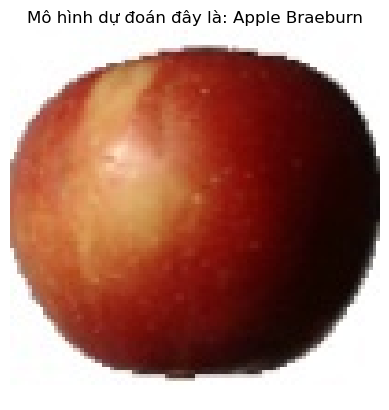

In [146]:
image_path = 'D:/AI/Dataset/archive1/Fruits360/Apple Braeburn/3_100.jpg'
predict_and_display(test_Model, image_path)

1/1 [==============================] - 0s 22ms/step


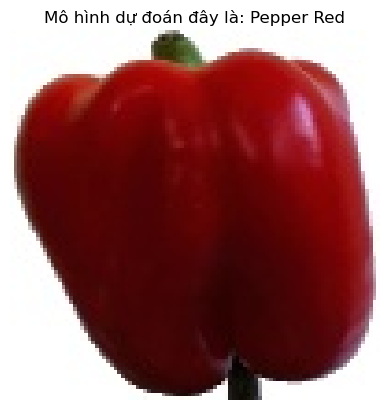

In [149]:
image_path = 'D:/AI/Dataset/archive1/Fruits360/Pepper Red/2_100.jpg'
predict_and_display(test_Model, image_path)

1/1 [==============================] - 0s 26ms/step


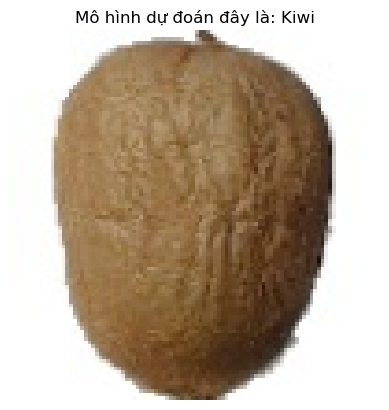

In [150]:
image_path = 'D:/AI/Dataset/archive1/Fruits360/Kiwi/5_100.jpg'
predict_and_display(test_Model, image_path)

1/1 [==============================] - 0s 25ms/step


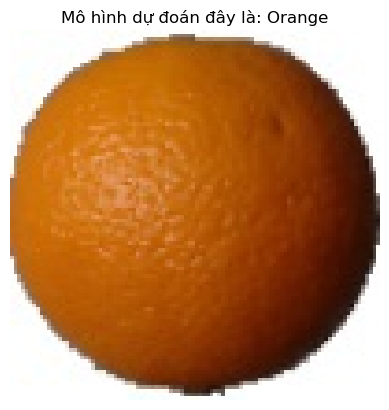

In [151]:
image_path = 'D:/AI/Dataset/archive1/Fruits360/Orange/5_100.jpg'
predict_and_display(test_Model, image_path)

### Kiểm thử hàng loạt

In [ ]:
test_dir = 'D:/AI/Dataset/archive1/Fruits360'

#### Kiểm thử với model đã được cải thiện

In [153]:
# Đánh giá model dựa với tham số là đường dẫn bộ kiểm thử và model cần đánh giá
def evaluate_model(dataset_path, model):
    # Khởi tạo một danh sách tên nhãn
    label_names = os.listdir(dataset_path)

    # Khởi tạo một từ điển để ánh xạ giữa tên nhãn và số nguyên
    label_mapping = {label: i for i, label in enumerate(label_names)}

    # Khởi tạo các biến
    labels = []
    predictions = []

    # Lặp qua tất cả các thư mục con trong thư mục dataset_path
    for label in label_names:
        label_path = os.path.join(dataset_path, label)

        # Lặp qua tất cả các hình ảnh trong thư mục con
        for img_name in tqdm(os.listdir(label_path), desc=f"Xử lý {label}"):
            img_path = os.path.join(label_path, img_name)

            # Đọc và chuẩn hóa hình ảnh
            img = image.load_img(img_path, target_size=(100, 100))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 255.0  # Chuẩn hóa pixel về khoảng [0, 1]

            # Dự đoán nhãn của hình ảnh
            prediction = model.predict(img_array, verbose=0)
            predicted_label = np.argmax(prediction)

            # Lưu trữ nhãn thực tế và dự đoán
            labels.append(label_mapping[label])
            predictions.append(predicted_label)

    # Tính toán và in ra báo cáo độ chính xác
    print("\nBáo cáo phân loại hình ảnh:")
    print(classification_report(labels, predictions, target_names=label_names))

In [155]:
evaluate_model(test_dir, test_Model)

Xử lý Watermelon: 100%|██████████████████████████████████████████████████████████████| 157/157 [00:08<00:00, 19.03it/s]


Báo cáo phân loại hình ảnh:
                    precision    recall  f1-score   support

    Apple Braeburn       1.00      1.00      1.00       164
Apple Granny Smith       1.00      1.00      1.00       164
           Apricot       1.00      1.00      1.00       164
           Avocado       1.00      1.00      1.00       143
            Banana       1.00      0.92      0.96       166
         Blueberry       1.00      0.82      0.90       154
      Cactus fruit       0.92      1.00      0.96       166
        Cantaloupe       0.91      1.00      0.95       164
            Cherry       1.00      1.00      1.00       164
        Clementine       1.00      1.00      1.00       166
              Corn       1.00      0.55      0.71       150
     Cucumber Ripe       1.00      1.00      1.00       130
        Grape Blue       0.92      1.00      0.96       328
              Kiwi       0.89      1.00      0.94       156
             Lemon       0.98      1.00      0.99       164
          

Báo cáo phân loại hình ảnh trình bày kết quả của mô hình trên một tập dữ liệu cụ thể. Dưới đây là một số nhận xét về báo cáo:

1. **Precision, Recall và F1-Score:**
   - Precision (độ chính xác): Chỉ số này đo lường tỷ lệ của các dự đoán dương tính thực sự đúng trên tổng số các dự đoán dương tính. Đối với tất cả các lớp, độ chính xác đều cao, thường là 1.00, ngoại trừ một số lớp như Corn, Onion White, Pear, nơi mà độ chính xác thấp hơn.

   - Recall (tỉ lệ nhớ): Đo lường khả năng của mô hình tìm ra tất cả các trường hợp dương tính thực sự. Đối với hầu hết các lớp, tỷ lệ nhớ đều rất cao (1.00), nhưng có một số lớp như Corn, Pear có tỷ lệ nhớ thấp.

   - F1-Score: Là sự kết hợp giữa precision và recall, giúp đánh giá hiệu suất tổng thể của mô hình. Đối với hầu hết các lớp, F1-Score là 1.00, nhưng có một số lớp như Corn, Pear có F1-Score thấp hơn do sự không cân bằng giữa precision và recall.

2. **Support:**
   - Support là số lượng mẫu thực tế của mỗi lớp trong tập dữ liệu. Nếu support thấp, có thể gây ra sự chệch trong đánh giá hiệu suất, đặc biệt là đối với các lớp có số lượng mẫu thấp.

3. **Accuracy:**
   - Tỉ lệ chính xác của mô hình trên toàn bộ tập dữ liệu là khoảng 96%, điều này là một hiệu suất tốt.

4. **Macro avg và Weighted avg:**
   - Macro avg tính toán trung bình của các chỉ số precision, recall và F1-Score cho từng lớp mà không quan tâm đến số lượng mẫu trong mỗi lớp. Weighted avg tính toán trung bình có trọng số, với trọng số là số lượng mẫu thực tế của mỗi lớp. Cả hai giá trị đều cao, cho thấy mô hình hoạt động tốt trên toàn bộ tập dữ liệu.

5. **Nhận xét chung:**
   - Mô hình thường hoạt động tốt, với độ chính xác tổng thể là 96%. Tuy nhiên, có một số lớp có thể đòi hỏi sự cải thiện đặc biệt là trong việc tăng cường độ chính xác và recall.

Tổng cộng, mặc dù mô hình có hiệu suất tốt, việc tập trung vào cải thiện độ chính xác và recall của các lớp có độ chính xác thấp hơn có thể làm cho nó trở nên hoàn thiện hơn.

#### Kiểm thử với model chưa được cải thiện

In [157]:
# Load mô hình
test_Model = load_model('D:/AI/Fruits_Classification_Model.h5')

In [158]:
evaluate_model(test_dir, test_Model)

Xử lý Watermelon: 100%|██████████████████████████████████████████████████████████████| 157/157 [00:09<00:00, 15.91it/s]


Báo cáo phân loại hình ảnh:
                    precision    recall  f1-score   support

    Apple Braeburn       1.00      0.82      0.90       164
Apple Granny Smith       0.85      1.00      0.92       164
           Apricot       1.00      1.00      1.00       164
           Avocado       1.00      1.00      1.00       143
            Banana       1.00      0.84      0.91       166
         Blueberry       1.00      1.00      1.00       154
      Cactus fruit       0.84      1.00      0.91       166
        Cantaloupe       0.82      1.00      0.90       164
            Cherry       1.00      1.00      1.00       164
        Clementine       1.00      1.00      1.00       166
              Corn       1.00      0.61      0.76       150
     Cucumber Ripe       1.00      1.00      1.00       130
        Grape Blue       1.00      1.00      1.00       328
              Kiwi       1.00      1.00      1.00       156
             Lemon       1.00      1.00      1.00       164
          

Để so sánh hai mô hình, chúng ta có thể xem xét các chỉ số chính trong báo cáo phân loại. Ở đây, cả hai báo cáo đều có accuracy cao (96%), macro avg và weighted avg cũng rất gần nhau, nên cả hai mô hình đều có hiệu suất tốt trên tập dữ liệu này.

Tuy nhiên, có một số điểm cần chú ý:

1. **Precision, Recall, F1-Score:**
   - Model thứ hai có những giá trị precision, recall và F1-score tốt hơn đối với nhiều lớp so với model đầu tiên. Điều này có nghĩa là mô hình thứ hai có khả năng dự đoán chính xác và tìm ra các trường hợp tích cực (positive) tốt hơn.

2. **Lớp Onion White:**
   - Đối với lớp Onion White, model thứ hai có recall thấp hơn (1.00 so với 0.72), nhưng precision cao hơn (0.57 so với 1.00). Điều này có thể là một lựa chọn tùy thuộc vào mục tiêu cụ thể của ứng dụng.

3. **Lớp Corn:**
   - Cả hai mô hình đều gặp khó khăn khi dự đoán lớp Corn, với recall thấp (0.55 và 0.61). Có thể cần kiểm tra thêm về tập dữ liệu hoặc điều chỉnh mô hình để cải thiện dự đoán cho lớp này.

4. **Lớp Pear:**
   - Model thứ hai có hiệu suất tốt hơn cho lớp Pear với recall và F1-score cao hơn so với model đầu tiên.

5. **Tóm tắt:**
   - Dựa trên bảng phân loại, có thể nói rằng model thứ hai có vẻ tốt hơn với nhiều lớp, đặc biệt là trong việc cải thiện recall và F1-score.

**Tuy nhiên, để đánh giá một cách toàn diện, cần phải xem xét cả các yếu tố ngoại vi như thời gian huấn luyện, kích thước mô hình, và yếu tố ứng dụng cụ thể. Đôi khi, sự lựa chọn giữa precision và recall phụ thuộc vào yêu cầu của vấn đề cụ thể mà mô hình đang giải quyết.**